In [140]:
import yfinance as yf


spy = yf.Ticker("SPY")

# get stock info
print(spy.info)

{'previousClose': 350.16, 'regularMarketOpen': 363.97, 'twoHundredDayAverage': 322.28058, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 364.38, 'navPrice': 350.32, 'averageDailyVolume10Day': 97255300, 'totalAssets': 277588738048, 'regularMarketPreviousClose': 350.16, 'fiftyDayAverage': 338.43713, 'trailingAnnualDividendRate': None, 'open': 363.97, 'toCurrency': None, 'averageVolume10days': 97255300, 'expireDate': None, 'yield': 0.0174, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 358.69, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 121277403, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 73653143, 'priceToSalesTrailing12Months': None, 'dayLow': 358.69, 'ask': 358.98, 'ytdReturn': None, 'askSize': 1200, 'volume': 12127

In [141]:
history = spy.history(period='60d',
    interval='30m')

In [142]:
history_day = spy.history(period='60d',
    interval='1d')

In [ ]:
prv - (30-open) + (close-hour)

In [143]:
half_into_condition = (history.index.hour == 9) & (history.index.minute == 30)
hour_before_condition = (history.index.hour == 15) & (history.index.minute == 0)

In [144]:
minus = history[half_into_condition]['Close']

In [145]:
plus = history[hour_before_condition]['Open']

In [146]:
plus.index = plus.index.date

In [147]:
minus.index = minus.index.date

In [148]:
data = history_day.merge(plus, left_index=True, right_index=True).merge(minus, left_index=True, right_index=True)

In [149]:
data['SMI'] = (data['Close_x'] - data['Open_y'] + data['Open_x'] - data['Close_y']).cumsum()

<AxesSubplot:>

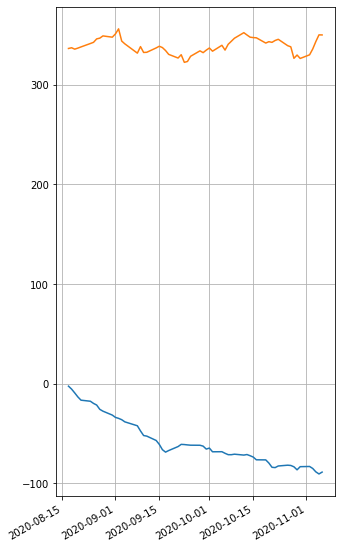

In [150]:
ax = data['SMI'].plot(figsize=[5,10])
data['Close_x'].plot(ax=ax, grid=True)

In [154]:
plus.tail()

2020-11-02    329.440002
2020-11-03    336.339996
2020-11-04    345.320007
2020-11-05    351.720001
2020-11-06    349.970001
Name: Open, dtype: float64

In [153]:
history_day.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-03,333.690002,338.250000,330.290009,336.029999,93294200,0.0,0
2020-11-04,340.859985,347.940002,339.589996,343.540009,126959700,0.0,0
2020-11-05,349.239990,352.190002,348.859985,350.239990,82039700,0.0,0
2020-11-06,349.929993,351.510010,347.649994,350.160004,74882600,0.0,0
2020-11-09,363.970001,364.380005,358.690002,359.910004,121285466,0.0,0


In [152]:
data['SMI'].tail()

2020-11-02   -83.342672
2020-11-03   -85.342672
2020-11-04   -88.762685
2020-11-05   -90.852712
2020-11-06   -88.992726
Name: SMI, dtype: float64

<AxesSubplot:>

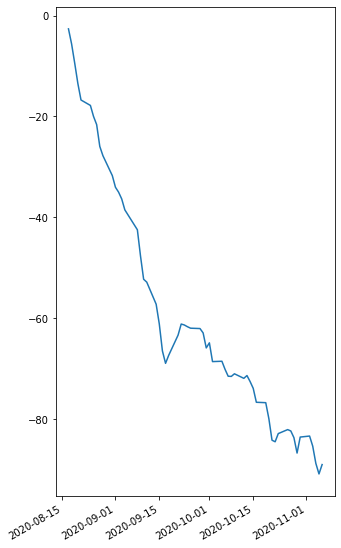

In [135]:
ax = data['SMI'].plot(figsize=[5,10])
data['Close_x'].plot(ax=ax, grid=True)